### 2.2.2 정규 방정식으로 풀이 구현하기

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_train, n_test = X_train.shape[0], X_test.shape[0]

In [2]:
X_train = np.append(np.ones((n_train, 1)), X_train, axis=1)

In [3]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [4]:
y_pred_train = X_train @ w
print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')

X_test = np.append(np.ones((n_test, 1)), X_test, axis=1)
y_pred = X_test @ w
print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}')

학습 데이터셋 MAE: 43.549
테스트 데이터셋 MAE: 42.618


### [예제 2.1] 정규 방정식 풀이의 수치적 불안정성

In [5]:
import numpy as np

np.random.seed(1234)
X = np.random.randn(1000, 10)
Y = np.linspace(0, 1, len(X))

In [6]:
print(f'X의 조건수: {np.linalg.cond(X)}')
print(f'X.T @ X의 조건수: {np.linalg.cond(X.T @ X)}')
print(f'X 조건수 제곱과 X.T @ X 조건수의 비율: {np.linalg.cond(X)**2 / np.linalg.cond(X.T @ X)}')

X의 조건수: 1.188426765463328
X.T @ X의 조건수: 1.4123581768696272
X 조건수 제곱과 X.T @ X 조건수의 비율: 1.0000000000000007


In [7]:
w_normal = (np.linalg.inv(X.T @ X)) @ X.T @ Y
w_svd, _, _, _ = np.linalg.lstsq(X, Y, rcond=None)

print(f'정규 방정식 풀이의 파라미터:\n{w_normal}\n')
print(f'SVD-OLS 풀이의 파라미터:\n{w_svd}\n')
print(f'두 해가 허용 오차 범위에서 같은지를 판별한 결과: {np.allclose(w_normal, w_svd)}')

정규 방정식 풀이의 파라미터:
[-0.00359211 -0.02161286  0.03721239  0.01295562  0.02589346  0.03504966
  0.00965059 -0.00626938 -0.01841618 -0.02176516]

SVD-OLS 풀이의 파라미터:
[-0.00359211 -0.02161286  0.03721239  0.01295562  0.02589346  0.03504966
  0.00965059 -0.00626938 -0.01841618 -0.02176516]

두 해가 허용 오차 범위에서 같은지를 판별한 결과: True


In [8]:
np.random.seed(1234)
X[:, 0] = X[:, 1] + 1e-10 * np.random.randn(len(X))

print(f'X의 조건수: {np.linalg.cond(X)}')
print(f'X.T @ X의 조건수: {np.linalg.cond(X.T @ X)}')
print(f'X 조건수 제곱과 X.T @ X 조건수의 비율:{np.linalg.cond(X)**2 / np.linalg.cond(X.T @ X): .3f}')

X의 조건수: 20373015086.902653
X.T @ X의 조건수: 1.4571859064484804e+16
X 조건수 제곱과 X.T @ X 조건수의 비율: 28483.651


In [9]:
w_normal = (np.linalg.inv(X.T @ X)) @ X.T @ Y
w_svd, _, _, _ = np.linalg.lstsq(X, Y, rcond=None)

print(f'정규 방정식 풀이의 파라미터:\n{w_normal}\n')
print(f'SVD-OLS 풀이의 파라미터:\n{w_svd}\n')
print(f'두 해가 허용 오차 범위에서 같은지를 판별한 결과: {np.allclose(w_normal, w_svd)}')

정규 방정식 풀이의 파라미터:
[ 5.59584067e+02 -5.59585071e+02  3.72809995e-02  1.29691645e-02
  2.56539793e-02  3.49624581e-02  9.65405635e-03 -6.30072498e-03
 -1.83916678e-02 -2.17846554e-02]

SVD-OLS 풀이의 파라미터:
[-6.81391319e+06  6.81391316e+06  3.72919036e-02  1.29792825e-02
  2.56644051e-02  3.50019927e-02  9.65402529e-03 -6.34375743e-03
 -1.84209465e-02 -2.17374936e-02]

두 해가 허용 오차 범위에서 같은지를 판별한 결과: False


### 2.3.3 SVD-OLS을 이용한 풀이 구현

In [10]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_train, n_test = X_train.shape[0], X_test.shape[0]

X_train = np.append(np.ones((n_train, 1)), X_train, axis=1)
X_test = np.append(np.ones((n_test, 1)), X_test, axis=1)

In [11]:
u, s, vh = np.linalg.svd(X_train, full_matrices=False)

w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
y_pred_train = X_train @ w
print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')

y_pred = X_test @ w
print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}')

학습 데이터셋 MAE: 43.549
테스트 데이터셋 MAE: 42.618


### 2.4.2 TSVD-OLS을 이용한 풀이 구현

In [12]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline

X, y = load_diabetes(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_train, n_test = X_train.shape[0], X_test.shape[0]

X_train = np.append(np.ones((n_train, 1)), X_train, axis=1)
X_test = np.append(np.ones((n_test, 1)), X_test, axis=1)

u, s, vh = np.linalg.svd(X_train, full_matrices=False)
print('Sigma 값:', s)

Sigma 값: [17.20470826  1.63118993  0.9658949   0.85050337  0.81673431  0.66217439
  0.62557419  0.5856106   0.569322    0.22995993  0.07211034]


In [13]:
num_trunc = 2

vh = vh[:-num_trunc, :]
s = s[:-num_trunc]
u = u[:, :-num_trunc]

w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
y_pred_train = X_train @ w
print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')

y_pred = X_test @ w
print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}')

학습 데이터셋 MAE: 43.659
테스트 데이터셋 MAE: 42.808


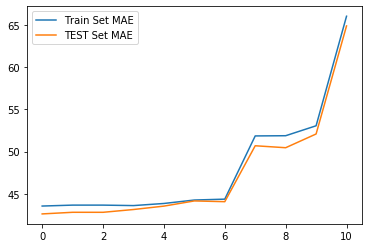

In [14]:
train_maes = []
test_maes = []

num_truncs = range(X_train.shape[1])

for num_trunc in num_truncs:
    u, s, vh = np.linalg.svd(X_train, full_matrices=False)
    
    if num_trunc != 0:
        vh = vh[:-num_trunc, :]
        s = s[:-num_trunc]
        u = u[:, :-num_trunc]

    w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
    y_pred_train = X_train @ w
    
    train_maes.append(np.abs(y_pred_train - y_train).mean())
    
    y_pred = X_test @ w
    
    test_maes.append(np.abs(y_pred - y_test).mean())
    
plt.plot(num_truncs, train_maes, label='Train Set MAE')
plt.plot(num_truncs, test_maes, label='TEST Set MAE')
plt.legend()

### [예제 2.2] 불안정한 행렬에서의 SVD-OLS 해의 불안정성과 TSVD-OLS 해의 안정성

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X = pd.DataFrame({})
F = [10**-i for i in range(11)]
for i in range(6): 
    X['F'+str(i)] = [j**i for j in F]

w = np.ones(6)
y = X @ w

X = X.sample(frac=1, random_state=1234)
split = 5

X_train, y_train = X.iloc[:split, :], y.iloc[:split]
X_test, y_test = X.iloc[split:, :], y.iloc[split:]
X

,F0,F1,F2,F3,F4,F5
8,1.0,1.000000e-08,1.000000e-16,1.000000e-24,1.000000e-32,1.000000e-40
2,1.0,1.000000e-02,1.000000e-04,1.000000e-06,1.000000e-08,1.000000e-10
9,1.0,1.000000e-09,1.000000e-18,1.000000e-27,1.000000e-36,1.000000e-45
10,1.0,1.000000e-10,1.000000e-20,1.000000e-30,1.000000e-40,1.000000e-50
1,1.0,1.000000e-01,1.000000e-02,1.000000e-03,1.000000e-04,1.000000e-05
0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
7,1.0,1.000000e-07,1.000000e-14,1.000000e-21,1.000000e-28,1.000000e-35
4,1.0,1.000000e-04,1.000000e-08,1.000000e-12,1.000000e-16,1.000000e-20
5,1.0,1.000000e-05,1.000000e-10,1.000000e-15,1.000000e-20,1.000000e-25
6,1.0,1.000000e-06,1.000000e-12,1.000000e-18,1.000000e-24,1.000000e-30


In [16]:
u, s, vh = np.linalg.svd(X_train, full_matrices=False)

w_svd = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
print(f'SVD-OLS 풀이의 파라미터: \n{w_svd}\n')

y_pred_train = X_train @ w_svd
print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')

y_pred = X_test @ w_svd
print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}')

SVD-OLS 풀이의 파라미터: 
[ 9.08739014e-01 -1.44062686e+08  6.53189502e+16 -7.17393845e+18
  6.40930419e+19  1.11444763e+19]

학습 데이터셋 MAE: 1.223
테스트 데이터셋 MAE: 2196362.437


In [17]:
u, s, vh = np.linalg.svd(X_train, full_matrices=False)

print(f'SVD의 Sigma 값:\n{s}')

SVD의 Sigma 값:
[2.23661449e+00 8.80680977e-02 7.96217717e-04 7.74208231e-12
 5.02364160e-21]


In [18]:
num_trunc = 2

u, s, vh = np.linalg.svd(X_train, full_matrices=False)

vh, s, u = vh[:-num_trunc, :], s[:-num_trunc], u[:, :-num_trunc]

w_tsvd = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train
print(f'TSVD-OLS 풀이의 파라미터:\n{w_tsvd}\n')

y_pred_train = X_train @ w_tsvd
print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')

y_pred = X_test @ w_tsvd
print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}')

TSVD-OLS 풀이의 파라미터:
[   2.67036682 -171.22435533 1528.21782961  168.27519134   16.98205322
    1.69975066]

학습 데이터셋 MAE: 0.106
테스트 데이터셋 MAE: 1.670


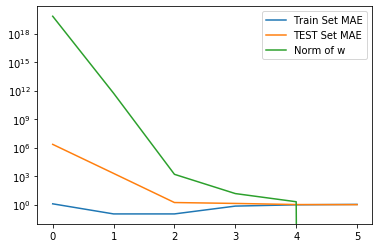

In [19]:
num_truncs = range(X_train.shape[1])
mae_train, mae_test, ws = [], [], []
for num_trunc in num_truncs:
    u, s, vh = np.linalg.svd(X_train, full_matrices=False)
    if num_trunc != 0:
        vh = vh[:-num_trunc, :]
        s = s[:-num_trunc]
        u = u[:, :-num_trunc]
    
    w = vh.T @ np.linalg.inv(np.diag(s)) @ u.T @ y_train

    y_pred_train = X_train @ w
    mae_train.append(np.abs(y_pred_train - y_train).mean())
    
    y_pred = X_test @ w
    mae_test.append(np.abs(y_pred - y_test).mean())
    
    ws.append(np.linalg.norm(w))

plt.yscale('log')
plt.plot(num_truncs, mae_train, label='Train Set MAE')
plt.plot(num_truncs, mae_test, label='TEST Set MAE')
plt.plot(num_truncs, ws, label='Norm of w')
plt.legend()

### [예제 2.3] LinearRegression 클래스 사용하기

In [20]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [21]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)

print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')

y_pred = reg.predict(X_test)
print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}')

학습 데이터셋 MAE: 43.549
테스트 데이터셋 MAE: 42.618


## 02 되새김 문제

### [되새김 문제 2.1] LinearRegression 클래스 적용하기

#### 문제

In [22]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

#### 풀이

In [23]:
reg = LinearRegression()

reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'RMSE: {np.sqrt(((y_pred - y_test)**2).mean()): .3f}')

RMSE:  52.917


### [되새김 문제 2.2] 계수가 양인 OLS 모델

#### 문제

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True, as_frame=True)
X = X[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]

#### 풀이

In [25]:
reg = LinearRegression(positive=True).fit(X, y)
print(f'계수:\n{reg.coef_:}')

계수:
[585.32306094 257.89983408   0.           0.           0.
  68.07534057 496.65568471  31.84470422]
